In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/Jupyter_Data_Visualization/master/kanjanaphisek_bangkok_pm25.csv')
df.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [58]:
df.rename(columns = {'UTC Hour':'Hour'},inplace = True)
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
df.drop(columns=['PM10_mask','Retrospective'],inplace=True)
df.head()

,Year,Month,Day,Hour,PM2.5,datetime
0,2016,3,3,8,62.9,2016-03-03 15:00:00
1,2016,3,3,9,62.9,2016-03-03 16:00:00
2,2016,3,3,10,55.5,2016-03-03 17:00:00
3,2016,3,3,11,55.5,2016-03-03 18:00:00
4,2016,3,3,12,47.9,2016-03-03 19:00:00


In [59]:
category = ['normal','high','very high']
df['Category'] = np.where(df['PM2.5']<50,'Normal','High')
df['Category'] = np.where(df['PM2.5']>100,'Very high','High')
df.head()

,Year,Month,Day,Hour,PM2.5,datetime,Category
0,2016,3,3,8,62.9,2016-03-03 15:00:00,High
1,2016,3,3,9,62.9,2016-03-03 16:00:00,High
2,2016,3,3,10,55.5,2016-03-03 17:00:00,High
3,2016,3,3,11,55.5,2016-03-03 18:00:00,High
4,2016,3,3,12,47.9,2016-03-03 19:00:00,High


In [67]:
category = ['normal','high','very high']
df['Category'] = pd.cut(df['PM2.5'],3)
df

,Year,Month,Day,Hour,PM2.5,datetime,Category,Category_1
0,2016,3,3,8,62.9,2016-03-03 15:00:00,"(50.0, 100.0]",High
1,2016,3,3,9,62.9,2016-03-03 16:00:00,"(50.0, 100.0]",High
2,2016,3,3,10,55.5,2016-03-03 17:00:00,"(50.0, 100.0]",High
3,2016,3,3,11,55.5,2016-03-03 18:00:00,"(50.0, 100.0]",High
4,2016,3,3,12,47.9,2016-03-03 19:00:00,"(-0.15, 50.0]",Normal
...,...,...,...,...,...,...,...,...
23809,2019,2,7,4,42.0,2019-02-07 11:00:00,"(-0.15, 50.0]",Normal
23810,2019,2,7,5,33.0,2019-02-07 12:00:00,"(-0.15, 50.0]",Normal
23811,2019,2,7,6,37.0,2019-02-07 13:00:00,"(-0.15, 50.0]",Normal
23812,2019,2,7,7,40.0,2019-02-07 14:00:00,"(-0.15, 50.0]",Normal


In [68]:
df['Category'].value_counts()

(-0.15, 50.0]     22006
(50.0, 100.0]      1717
(100.0, 150.0]       91
Name: Category, dtype: int64

In [69]:
arr = []
for i in df['PM2.5']:
    if i<50:
        arr.append('Normal')
    elif i<100:
        arr.append('High')
    else:
        arr.append('Very high')

In [70]:
len(arr)

23814

In [71]:
df['Category_1'] = arr

In [72]:
df.head()

,Year,Month,Day,Hour,PM2.5,datetime,Category,Category_1
0,2016,3,3,8,62.9,2016-03-03 15:00:00,"(50.0, 100.0]",High
1,2016,3,3,9,62.9,2016-03-03 16:00:00,"(50.0, 100.0]",High
2,2016,3,3,10,55.5,2016-03-03 17:00:00,"(50.0, 100.0]",High
3,2016,3,3,11,55.5,2016-03-03 18:00:00,"(50.0, 100.0]",High
4,2016,3,3,12,47.9,2016-03-03 19:00:00,"(-0.15, 50.0]",Normal


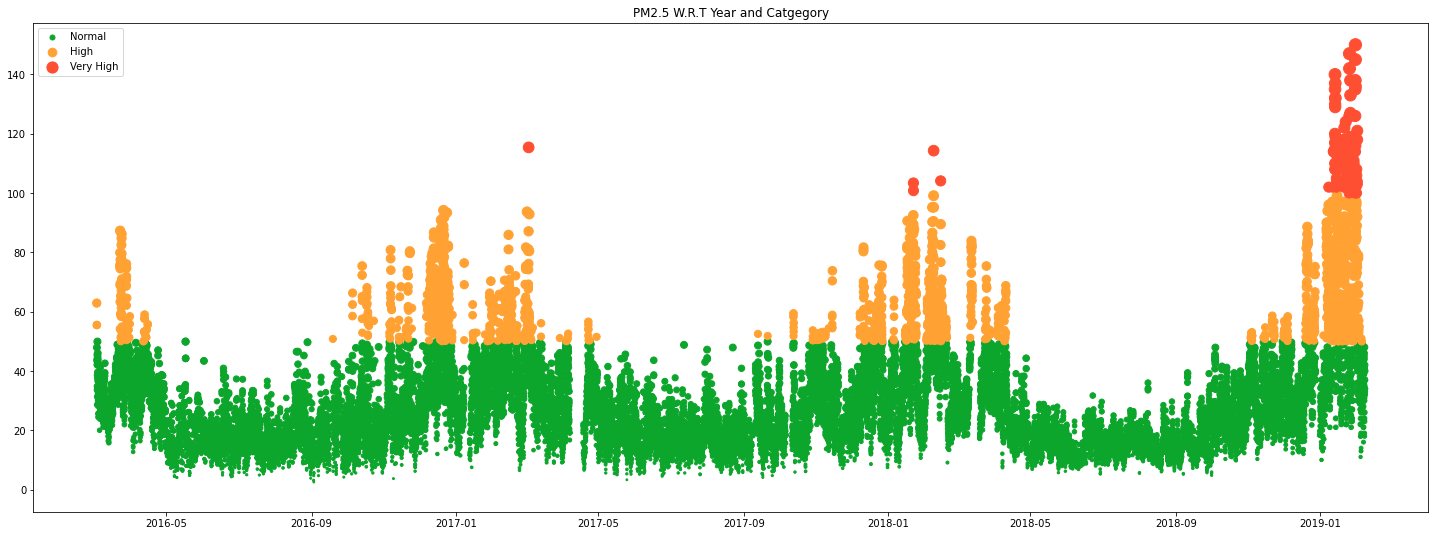

In [95]:
fig,ax = plt.subplots(1, figsize=(25,9))

x1 = df[df['Category_1']=='Normal']['datetime']
y1 = df[df['Category_1']=='Normal']['PM2.5']
ax.scatter(x1,y1,s=y1,label = 'Normal',color = '#0CA62C')

x2 = df[df['Category_1']=='High']['datetime']
y2 = df[df['Category_1']=='High']['PM2.5']
ax.scatter(x2,y2,s=y2,label = 'High',color = '#FFA233')

x3 = df[df['Category_1']=='Very high']['datetime']
y3 = df[df['Category_1']=='Very high']['PM2.5']
ax.scatter(x3,y3,s =y3,label = 'Very High',color = '#FF4F33' )

ax.set_title("PM2.5 W.R.T Year and Catgegory")
ax.legend()
plt.show()